In [5]:
# NOTE: Uncomment if you're running on colab but it's better to install from requirements file
# !pip install googletrans==3.1.0a0
# !pip install yolov5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=fe6b037d6c7f8d4aa9b670eab2bcd259184f7e1e1ad90e46045034eb57777e8d
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans
  Attempting uninstall: googletrans
    Found existing installation: googletrans 3.0.0
    Uninstalling googletrans-3.0.0:
      Successfully uninstalled googletrans-3.0.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached yolov5-6.2.3-py36.py37.py38-none-any.whl (948 kB)
  Using cached sahi-0.11.5-py3-none-any.whl (94 kB)
  Using cached fire-0.4.0.tar.gz (87 kB)
  Using cached thop-0.1.1.post2209072238-py3-none-any.whl (15 kB)
  Using cached boto3-1.26.17-py3-none-any.whl (132 kB)
  Using cached s3transfer-0.6.0-py3-none-any.whl (7

In [1]:
import time
import cv2
import yolov5
from googletrans import Translator

def get_yolov5_model(size='n'):
    model_name = f'yolov5{size}.pt'
    model = yolov5.load(model_name)
    # set model parameters
    model.conf = 0.25  # NMS confidence threshold
    model.iou = 0.45  # NMS IoU threshold
    model.agnostic = False  # NMS class-agnostic
    model.multi_label = True  # NMS multiple labels per box
    model.max_det = 5  # maximum number of detections per image
    model._get_name
    return model


def yolov5_process(model, frame):
    results = model(frame)
    new_frame = results.render()[0]
    return new_frame

def translate_model_classes(model, target_lang='ru'):
    translator = Translator()
    for i in range(len(model.names)):
        translated_name = translator.translate(model.names[i], src='en', dest=target_lang).text
        model.names[i] = f'{model.names[i]} ({translated_name})'

In [4]:
model = get_yolov5_model(size='n')
translate_model_classes(model)

img = cv2.imread('testing_images/image1.jpg')

output = yolov5_process(model, img)

INFO:yolov5:Downloading https://ultralytics.com/assets/Arial.Unicode.ttf to /root/.config/Ultralytics/Arial.Unicode.ttf...


Populating the interactive namespace from numpy and matplotlib


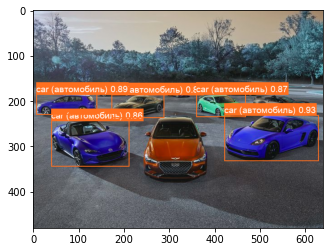

In [10]:
%pylab inline

import matplotlib.pyplot as plt

plt.imshow(output)
plt.show()